<a href="https://colab.research.google.com/github/MAY2704/ML_usecases/blob/main/Classification_example/RF_Classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data classification program with machine learning to predict sensitivity of a column using metadata input**


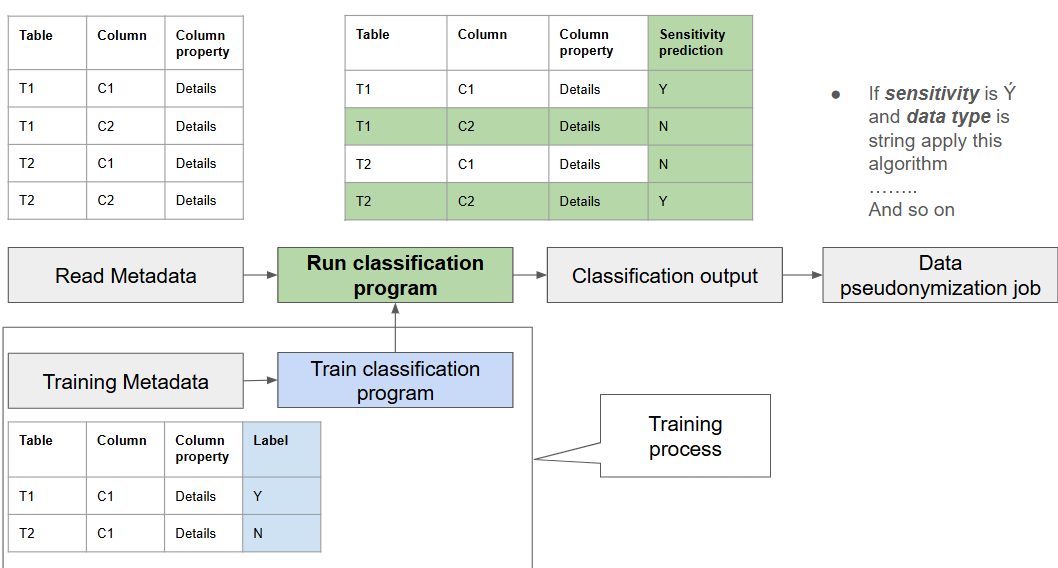

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import export_graphviz
import pydotplus
from rich import print
def train_and_evaluate_model(df):
    """
    Trains and evaluates a Random Forest Classifier on the given DataFrame.

    Args:
        df (pd.DataFrame): DataFrame containing column metadata.

    Returns:
        sklearn.ensemble._forest.RandomForestClassifier: Trained model.
    """

    # One-hot encode categorical features
    categorical_cols = ["Table", "Column", "DataType", "PrimaryKey"]
    encoder = OneHotEncoder(handle_unknown='ignore')
    encoded_features = encoder.fit_transform(df[categorical_cols])
    encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out())

    # Concatenate encoded features with the target variable
    df = pd.concat([df["Sensitivity"], encoded_df], axis=1)

    # Separate features and target variable
    X = df.drop("Sensitivity", axis=1)
    y = df["Sensitivity"]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    #print(classification_report(y_test, y_pred))

    # Get the first decision tree from the forest
    tree = model.estimators_[0]

    # Visualize the tree
    export_graphviz(tree, out_file='tree.dot',
                    feature_names=X.columns,
                    class_names=['Not sensitive', 'Sensitive'],
                    filled=True, rounded=True,
                    special_characters=True)

    # Convert the dot file to a PNG image
    graph = pydotplus.graph_from_dot_file('tree.dot')
    graph.write_png('tree.png')

    return model, encoder

# Load the training data
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Clasf/training_data_classification.csv')

# Train the model
model, encoder = train_and_evaluate_model(df)

# Create new data
new_data = {
    "Table": ["CUSTOMER", "CUSTOMER_ACC"],
    "Column": ["NAME", "EMAIL_ADDRESS"],
    "DataType": ["string", "string"],
    "PrimaryKey": ["N", "N"]
}

new_df = pd.DataFrame(new_data)

# Encode new data using the same encoder
categorical_cols = ["Table", "Column", "DataType", "PrimaryKey"]
new_data_encoded = encoder.transform(new_df[categorical_cols])
new_df_encoded = pd.DataFrame(new_data_encoded.toarray(), columns=encoder.get_feature_names_out())

# Predict sensitivity for new data
predictions = model.predict(new_df_encoded)

print("[bold cyan] Predicted sensitivity for new data:", predictions)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Accuracy: 0.9090909090909091

 Predicted sensitivity for new data: ['Y' 'N']